In [105]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random
import seaborn as sns
from matplotlib.colors import ListedColormap


## part 1: Forwardprop

### 1.1 Draw a network

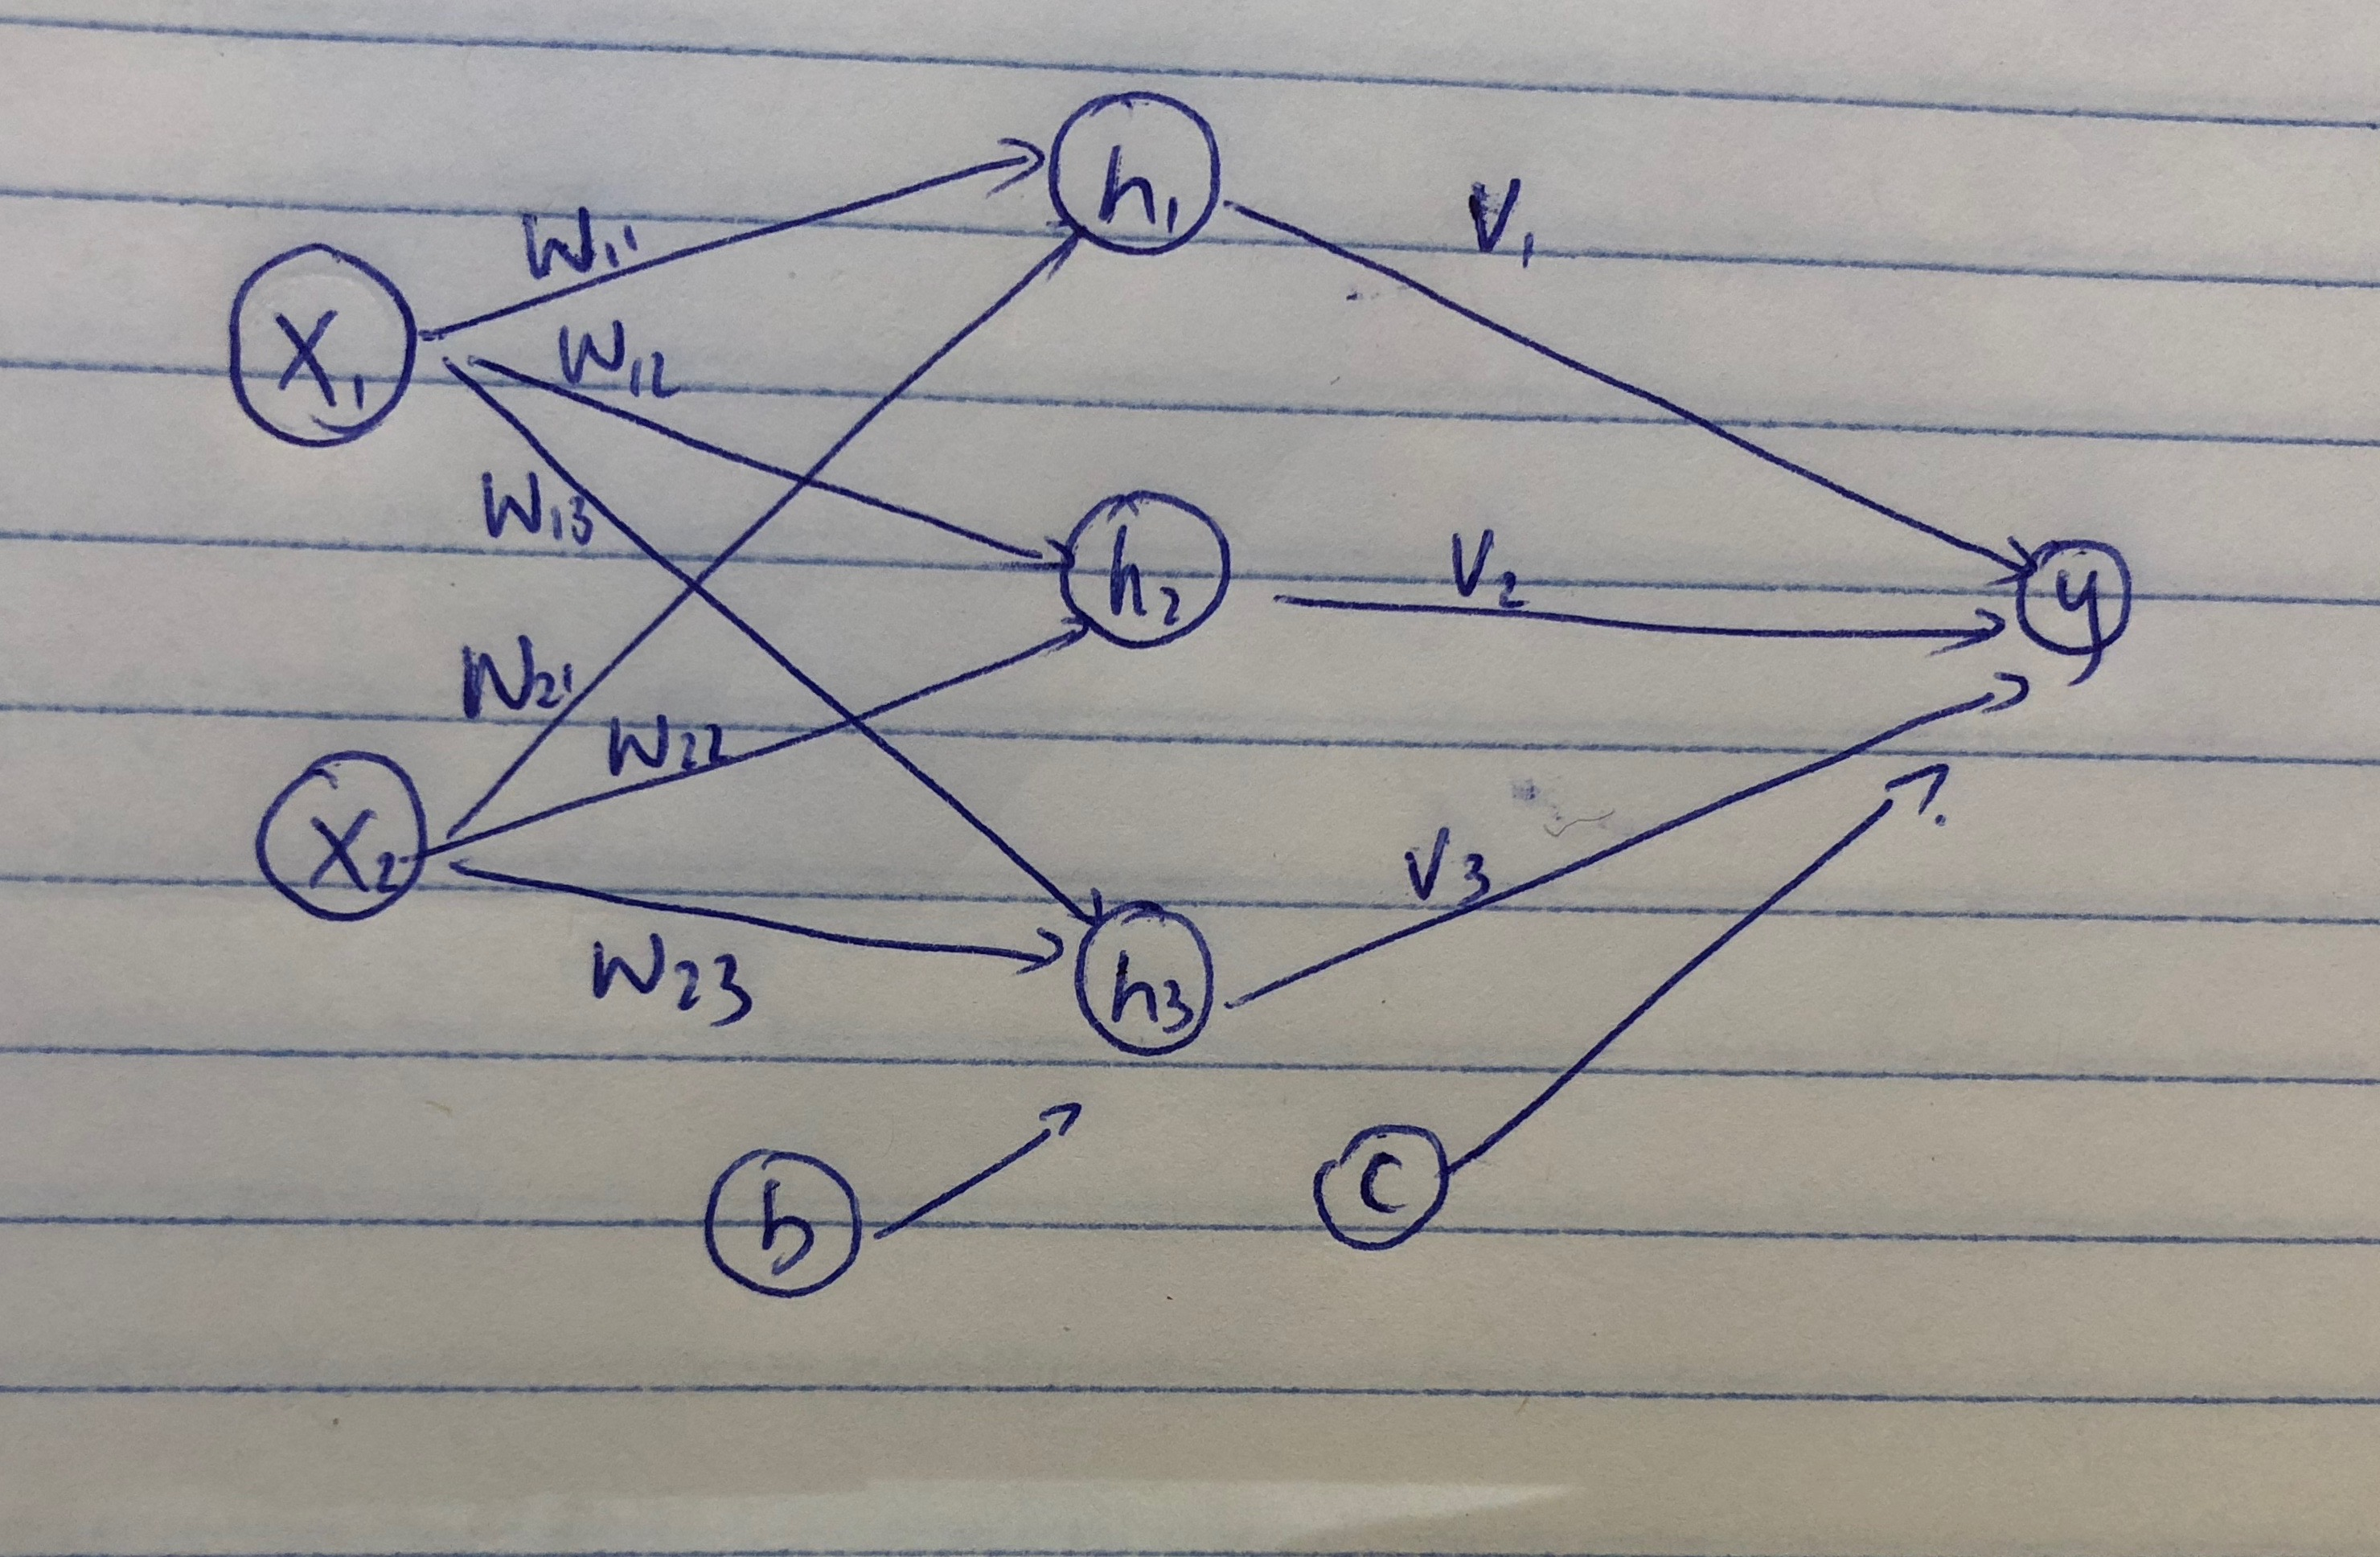

In [2]:
from IPython.display import Image
PATH = "/Users/qq/Desktop/"
Image(filename = PATH + "IMG_4113.jpg", width=1000, height=100)

### 1.2 Write out the mathematical equation for the output of this network


$\\h1 = ReLu(W_{11}* X_1 + W_{12}*X_2+b1)\\
\\h2 = ReLu(W_{12}*X_1 + W_{22}*X_2+b2)\\
\\h3 = ReLu(W_{13}*X_1 + W_{23}*X_2+b3)\\
\\y = sigmoid(h_1*v_1+h_2*v_2+h_3*v_3)$

### 1.3 Write out the forward-pass function in python, call it ff nn ReLu(...)


In [3]:
def ReLu(x):    
    return np.maximum(x,0)

def sigmoid(z):
    return 1/(1+np.exp(-z))
    
    
def ff_nn_Relu(x,W,b,V,c):
    h = ReLu(np.dot(W,x) + b  )                 
    y = sigmoid(np.dot(V,h) + c )
    return y


### 1.4 Compute output

In [4]:
x = np.array([[1,0,0],[-1,-1,1]])
W = np.array([[1,0],[-1,0],[0,0.5]])
b = np.array([[0],[0],[1]])
V = np.array([[1,0,-1]])
c = np.array([[1]])

y = ff_nn_Relu(x,W,b,V,c)
y

array([[ 0.81757448,  0.62245933,  0.37754067]])

## part 2 gradient descent

### 2.1: What are the partial derivatives of f with respect to x and to y?

In [5]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2-200*(y**2-x)
    df_dy = 400*y*(y**2-x)
    return np.array([df_dx, df_dy])

### 2.2: Create a visualization of the contours of this function.

<a list of 12 text.Text objects>

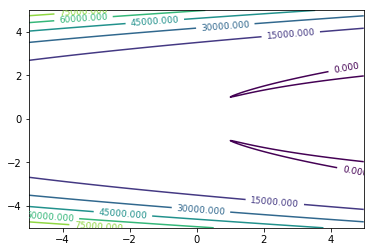

In [6]:
x = np.arange(-5.0, 5.0, 0.025)
y = np.arange(-5.0, 5.0, 0.025)

X, Y = np.meshgrid(x, y)

f = (1-X**3)+100*(Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, f)
ax.clabel(CS, fontsize=9, inline=1)

### 2.3: Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [7]:
# apply gradient decent to find the point where loss fucntion has the minimum value
def grad_descent(starting_point=None, iterations=10, learning_rate=0.01):
    if starting_point:
        point = starting_point
   
    else:
        point = np.random.uniform(-10,10,size=2) # split steps
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

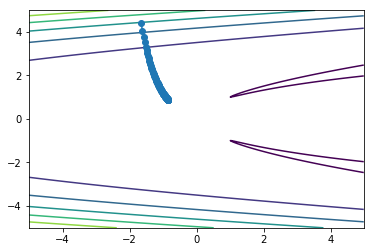

In [8]:
# learning rate is 0.00001
np.random.seed(1)
traj = grad_descent(iterations=100, learning_rate=0.00001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, f)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

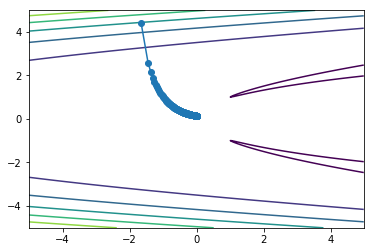

In [9]:
# learning rate is 0.00008
np.random.seed(1)
traj = grad_descent(iterations=1000, learning_rate=0.00005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, f)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

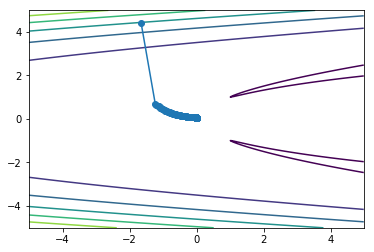

In [10]:
# learning rate is 0.0001
np.random.seed(1)
traj = grad_descent(iterations=1000, learning_rate=0.0001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, f)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### 2.4: Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm's hyperparameters.

In [11]:
def grad_descent_with_momentum(starting_point=None, iterations=100, alpha=0.01, epsilon=0.001):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

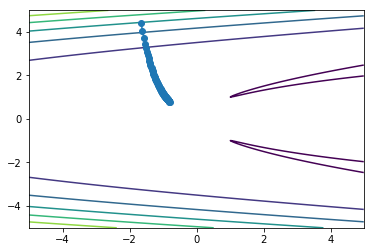

In [12]:
# epsilon=0.00001, alpha=0.1
np.random.seed(1)
traj = grad_descent_with_momentum(iterations=100, epsilon=0.00001, alpha=0.1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, f)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

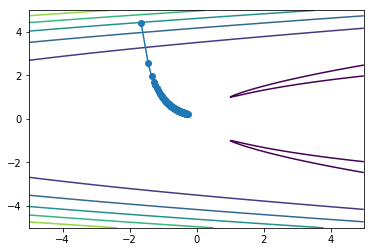

In [13]:
# epsilon=0.00005, alpha=0.1
np.random.seed(1)
traj = grad_descent_with_momentum(iterations=100, epsilon=0.00005, alpha=0.1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, f)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

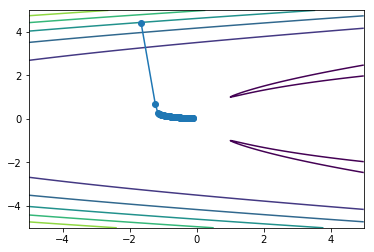

In [14]:
# epsilon=0.00005, alpha=0.1
np.random.seed(1)
traj = grad_descent_with_momentum(iterations=100, epsilon=0.0001, alpha=0.1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, f)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Part 3: Backprop

### 3.1 derive expressions of the gradient of the Loss function with respect to each of the model parameters.

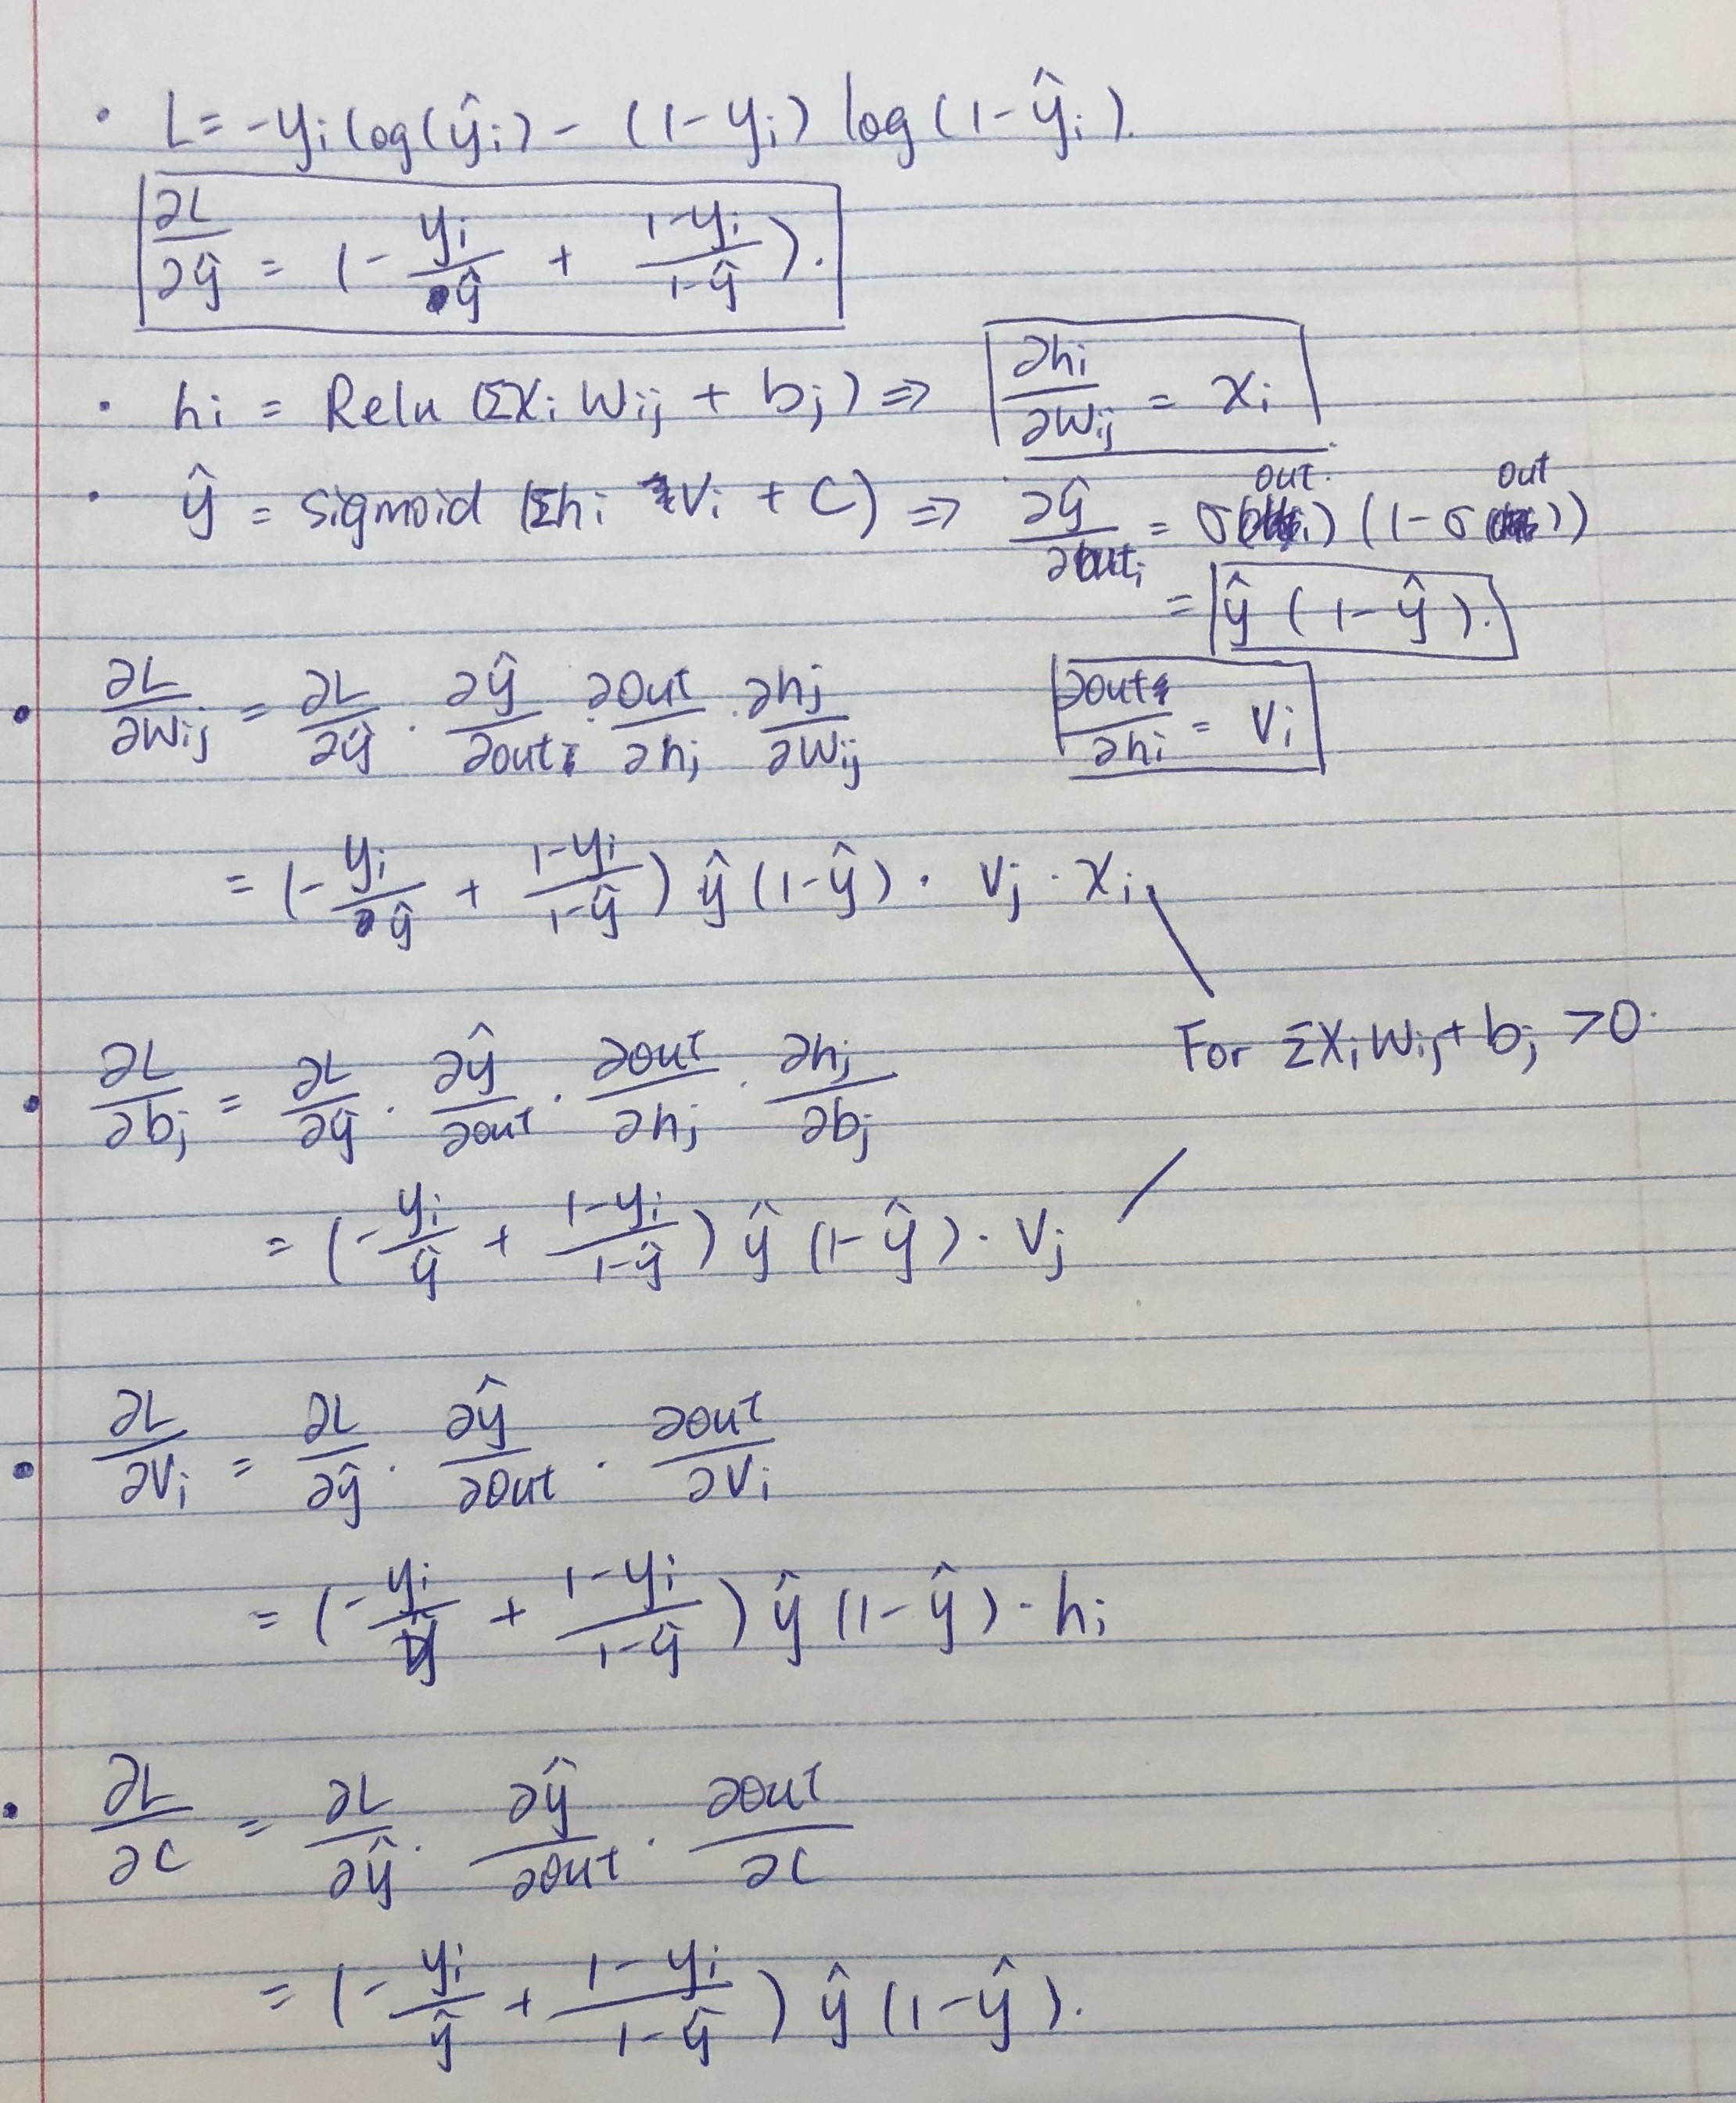

In [167]:
PATH = "/Users/qq/Desktop/"
Image(filename = PATH + "IMG_4114.jpg", width=800, height=100)

$$
\frac{\partial l}{\partial w_{ji}} =\frac{\partial l}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial h_j}\frac{\partial h_j}{\partial w_{ji}} =(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})v_j x_i \\ 
for \sum{x_iw_{ij}}+b_j>0,otherwise 0\\
\frac{\partial l}{\partial b_j} =\frac{\partial l}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial h_j}\frac{\partial h_j}{\partial b_j} =(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})v_j\\ for \sum{x_iw_{ij}}+b_j>0,otherwise 0\\
\frac{\partial l}{\partial v_i} = \frac{\partial l}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial v_1} = (-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})h_i \\ 
\frac{\partial l}{\partial c} = \frac{\partial l}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial c}=(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y}) \\
 $$

### 3.2 Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [130]:
def d_relu(x):
    return np.where(x>0, 1, 0)

def grad_f(x,y,params):
    w,v,b,c = params
    h = ReLu(np.dot(x, w) + b)
    y_hat = sigmoid(np.dot(h,v) + c)
    y = y.reshape(500,1)
    
    dc = ((-y/y_hat+(1-y)/(1-y_hat))*y_hat*(1-y_hat)).sum()
    dv = h.T.dot((-y/y_hat+(1-y)/(1-y_hat))*y_hat*(1-y_hat))
    db = (((-y/y_hat+(1-y)/(1-y_hat))*y_hat*(1-y_hat)).dot(v.T)*d_relu(h)).sum(axis=0)
    dW = x.T.dot(((-y/y_hat+(1-y)/(1-y_hat))*y_hat*(1-y_hat)).dot(v.T)*d_relu(h))
    return (dW,dv,db,dc)

In [131]:
# set parameters
np.random.seed(123)
w = np.random.randn(6).reshape(2,3)
v = np.random.randn(3).reshape(3,1)
b = np.random.randn(3).reshape(1,3)
c = np.random.randn(1).reshape(1,1)
params = w,v,b,c 
x = np.random.randn(1000).reshape(500,2)
y = np.random.randn(500).reshape(500,1)
print('The gradient of w,v,b,c are' ,grad_f(x,y,params))

The gradient of w,v,b,c are (array([[  74.32705504,  -39.84352358,   26.66466027],
       [  25.61804843,   -5.03744839,  236.89650398]]), array([[  22.85923921],
       [  43.84948462],
       [ 293.8323106 ]]), array([ -73.61836955,  -26.53683559,  282.88864331]), 311.8097029122597)


### 3.3 Generate a synthetic dataset like the XOR pattern (see below)

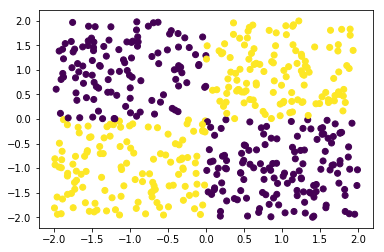

In [132]:
x = np.random.uniform(low=-2,high=2,size=(500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

### 3.4 Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [133]:
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)+(1-y)*np.log(1-y_hat)
    return  -tot.sum()


def y_hat(x,params):
    w,v,b,c = params
    h = ReLu(np.dot(x, w) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y


def grad_f_descent(x, y, starting_point=params, iterations=1000, learning_rate=1e-2):

    point = starting_point
    trajectory = [point]
    losses = [loss(y, y_hat(x, point))]

    for i in range(iterations):
        grads =  grad_f(x, y,point)
        a = zip(point, grads)
        new_value = []
        for (matrix, grad) in a:
            new_value.append(matrix - learning_rate*grad)
            
        point = tuple(new_value)
        trajectory.append(point)
        losses.append(loss(y, y_hat(x, point)))
    return (np.array(trajectory), losses)


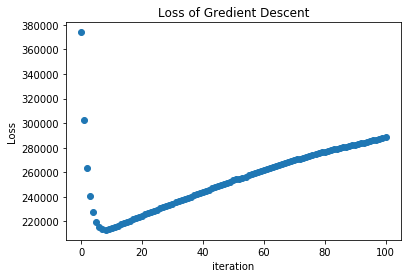

In [134]:
#plot
traj, losses = grad_f_descent(x, y, starting_point=params,iterations=100,learning_rate=0.001)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Loss of Gredient Descent')
plt.plot(losses,'o')


### 3.5 Repeat the exercise above using Momentum. 

In [135]:
def grad_f_descent_momentum(x, y, starting_point, iterations=10, learning_rate=1e-4,alpha=0.001):
    previous=None
    point = starting_point 
    trajectory = [point]
    losses = [loss(y, y_hat(x, point))]
    
    for i in range(iterations):
        grads = grad_f( x, y,point)
        a = zip(point, grads)
        new_value = []
        
        if not previous:
            for (matrix, grad) in a:
                new_value.append(matrix - learning_rate*grad)
        else:
            for (matrix, grad, previous) in zip(point, grads,previous):
                new_value.append(matrix - learning_rate*grad - alpha*previous)
        previous = grads
        point = tuple(new_value)
        trajectory.append(point)
        losses.append(loss(y, y_hat(x, point)))
    return (np.array(trajectory), losses)

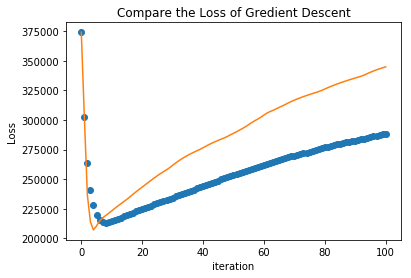

In [136]:
traj2, losses2 = grad_f_descent_momentum(x, y, starting_point=params, iterations=100,learning_rate=0.001,alpha=0.001)
plt.plot(losses,'o')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Compare the Loss of Gredient Descent')
plt.plot(losses2)

###  Comment on whether your algorithm seems to converge more efficiently.

The blue scatterplot shows the loss of the gredient decent and orange line indicates the loss of gredient descent with momentum. It is obvious that the orange line resaches the bottom before the blue scatterplot, this means that having momentum we can get least loss with less iternations. Therefore,t gredient descent with momentum is more efficient.

### 3.6 Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

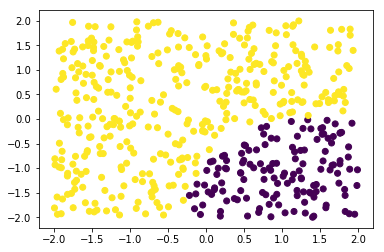

In [104]:
# plot the result of prediction
y_pred = y_hat(x, traj2[-1])
y_pred[y_pred >=0.5] = 1
y_pred[y_pred < 0.5] = 0
plt.scatter(x[:,0],x[:,1],c=y_pred.reshape(500))

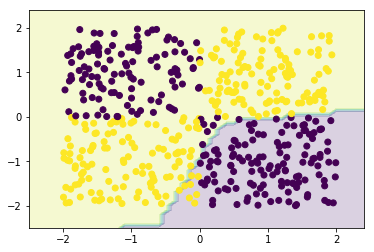

In [166]:
xx, yy = np.meshgrid(np.arange(-2.5,2.5,0.1), np.arange(-2.5,2.5,0.1))
a=np.array([xx.ravel(), yy.ravel()]).T
z=y_hat(a,traj2[-1])>0.5
z=z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.2)
plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y))